Introduction
-----


In [1]:
class JohnPaton():
    def __init__(self):
        self.name = 'John Paton'
        self.job = 'Data Science Consultant'
        self.company = 'KPMG'
        self.background = 'Theoretical Physics'
        self.twitter = '@jd_paton'
        self.github = 'johnpaton'
        self.slides = 'RISE'
        
john = JohnPaton()

In [2]:
print(john.twitter)

@jd_paton


[Link to RISE repository](https://github.com/damianavila/RISE)

The plan
----

1. Inspiration

2. Markov Models

    1. Theory
    
    2. Implementation

3. `engl_ish`

4. Results



Inspiration
====

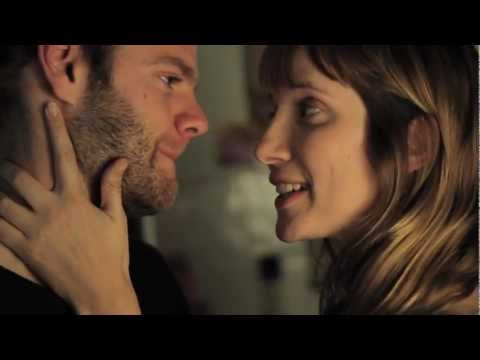

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Vt4Dfa4fOEY', iv_load_policy=3) # turn off annotations

The plan
----

1. ~~Inspiration~~ 

2. Markov Models

    1. **Theory**
    
    2. Implementation

3. `engl_ish`

4. Results



Markov Models
----

* Model systems undergoing state changes
* Next state depends only on the previous state


In [4]:
import pandas as pd

In [5]:
lights = pd.DataFrame([[0,0,1],[1,0,0],[0,1,0]])
lights.columns = ['red','yellow','green']
lights.index = ['red','yellow','green']

In [6]:
lights

,red,yellow,green
red,0,0,1
yellow,1,0,0
green,0,1,0


Slightly less trivial...
----

In [7]:
import numpy as np
baby_states = ['crying','sleeping','laughing','quiet']
baby = pd.DataFrame(columns = baby_states, index = baby_states,
                   dtype=float)
baby.loc['crying']   = [0.4, 0.3, 0.1, 0.2]
baby.loc['sleeping'] = [0.6, 0.3, 0.0, 0.1]
baby.loc['laughing'] = [0.2, 0.1, 0.4, 0.3]
baby.loc['quiet']    = [0.3, 0.4, 0.2, 0.1]

In [8]:
baby

,crying,sleeping,laughing,quiet
crying,0.4,0.3,0.1,0.2
sleeping,0.6,0.3,0.0,0.1
laughing,0.2,0.1,0.4,0.3
quiet,0.3,0.4,0.2,0.1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

def heatmap(df, size=(8,6), linewidths=1, title='', **kwargs):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.heatmap(df, linewidths=linewidths, linecolor='k', **kwargs, ax=ax,square=True)
    ax.xaxis.set_ticks_position('top'); ax.xaxis.set_label_position('top')
    plt.yticks(rotation=0) 
    if title:
        ax.set_title(title+'\n\n')
    ax.set_ylabel('From'); ax.set_xlabel('To'); plt.yticks(rotation=0) 

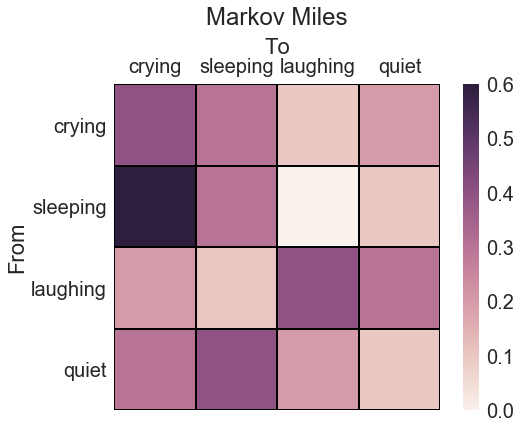

In [10]:
heatmap(baby, title='Markov Miles')

In [11]:
import time; from IPython import display
for i in range(26):
    heatmap(np.linalg.matrix_power(baby,i), 
            title='Markov Miles After {} steps'.format(i), 
            xticklabels=list(baby.columns), yticklabels=list(baby.index), vmin=0)
    display.clear_output(wait=True); display.display(plt.show())
    time.sleep(min(i,1) * 5/(i/2+1)**2)
display.clear_output() # comment out to leave plot up

In [12]:
for i in range(51):
    heatmap(np.linalg.matrix_power(lights,i), 
            title='Traffic Lights After {} steps'.format(i), 
            xticklabels=list(lights.columns),yticklabels=list(lights.index), vmin=0)
    display.clear_output(wait=True); display.display(plt.show())
    time.sleep(min(i,1) * 5/(i/2+1)**2)
display.clear_output() # comment out to leave plot up

Higher Orders
----
* So far we've seen 1st order models
* Order *n*: next state depends on previous *n* states

Question: How to encode this?

Higher Orders
----
Answer:
* Higher order "states" are chains of last *n* lower order states
    * Markov baby 1st order states: `crying`, `sleeping`, `laughing`, `quiet`
    * Markov baby 2nd order states: `sleeping-sleeping`, `laughing-quiet`, ...
* Higher order models *can be* 1st order models of higher order states

In [13]:
baby_states2 = [state1+'-'+state2 for state1 in baby_states for state2 in baby_states]
baby_2x2 = pd.DataFrame(index=baby_states2, columns = baby_states2)
baby_2x1 = pd.DataFrame(index=baby_states2, columns = baby_states)

Higher Orders
----
Encoding options

In [14]:
baby_2x2 # 2x1 = 2x2

,crying-crying,crying-sleeping,crying-laughing,crying-quiet,sleeping-crying,sleeping-sleeping,sleeping-laughing,sleeping-quiet,laughing-crying,laughing-sleeping,laughing-laughing,laughing-quiet,quiet-crying,quiet-sleeping,quiet-laughing,quiet-quiet
crying-crying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crying-sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crying-laughing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crying-quiet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleeping-crying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleeping-sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleeping-laughing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleeping-quiet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
laughing-crying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
laughing-sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The plan
----

1. ~~Inspiration~~ 

2. Markov Models

    1. ~~Theory~~
    
    2. **Implementation**

3. `engl_ish`

4. Results

Distributions
----


In [53]:
from engl_ish import Distribution
baby_dict = {'crying':8,'sleeping':10,'laughing':3,'quiet':4}
baby_dist = Distribution(baby_dict)

In [54]:
baby_dist.normalize()
baby_dist.norm

{'crying': 0.32, 'laughing': 0.12, 'quiet': 0.16, 'sleeping': 0.4}

In [57]:
[baby_dist.draw() for _ in range(5)] # np.random.choice(vals, p=probs)

['quiet', 'sleeping', 'quiet', 'crying', 'quiet']

In [18]:
baby_dist.increment('crying',100000)
[baby_dist.draw() for _ in range(5)]

['crying', 'crying', 'crying', 'crying', 'crying']

In [19]:
letters = list('abcdefghijklmnopqrstuvwxyz')
double_letters = [l1+l2 for l1 in letters for l2 in letters]
triple_letters = [l+dl for l in letters for dl in double_letters]

Be smart with searching!
----

In [20]:
print(triple_letters[0:5],'...',triple_letters[-5:])

d = {tl:0 for tl in triple_letters}

%timeit [tl in list(d.keys()) for tl in triple_letters]
%timeit [tl in triple_letters for tl in triple_letters]
%timeit [tl in d.keys()       for tl in triple_letters]
%timeit [tl in d              for tl in triple_letters]

['aaa', 'aab', 'aac', 'aad', 'aae'] ... ['zzv', 'zzw', 'zzx', 'zzy', 'zzz']
1 loop, best of 3: 4.39 s per loop
1 loop, best of 3: 2.08 s per loop
100 loops, best of 3: 2.16 ms per loop
1000 loops, best of 3: 954 µs per loop


Markov Models
----

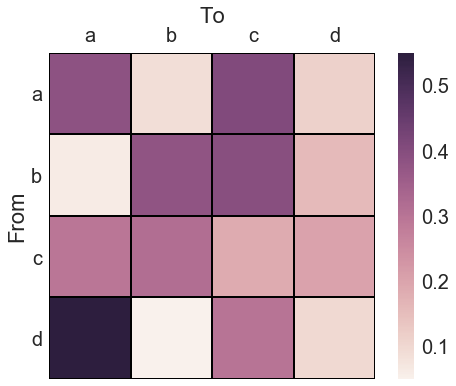

In [46]:
from engl_ish import Markov_Model; import random
mm = Markov_Model()
for i in 'abcd':
    for j in 'abcd':
        mm.increment(i, j, random.randint(0,25))
        
df = mm.to_df()
heatmap(df)

The plan
----

1. ~~Inspiration~~ 

2. ~~Markov Models~~

    1. ~~Theory~~
    
    2. ~~Implementation~~

3. **`engl_ish`**

4. Results

Training data
----

* `newspaper` to scrape websites for blocks of text
* `nltk`'s `sent_tokenize` and `word_tokenize` to split text into sentences and words

In [23]:
import engl_ish
source = engl_ish.load_source('german_newspaper_42919_source.pickle')

for i in range(3):
    print(source[i])

['Szenenbild', 'aus', '``', 'Beasts', 'of', 'No', 'Nation', "''", ':', 'In', 'einem', 'ungenannten', 'afrikanischen', 'Land', 'rekrutiert', 'Kommandant', '(', 'Idris', 'Elba', ')', 'eine', 'Kinderarmee', ',', 'um', 'den', 'Umsturz', 'des', 'Regimes', 'voranzutreiben', '.']
['Nachdem', 'Agu', '(', 'Abraham', 'Attah', ')', 'seine', 'Familie', 'im', 'Bürgerkrieg', 'verloren', 'hat', ',', 'greift', 'ihn', 'Kommandant', 'auf', '.']
['Halb', 'Vaterfigur', ',', 'halb', 'Tyrann', ':', 'Kommandant', 'weiß', ',', 'wie', 'er', 'die', 'Kinder', 'für', 'seine', 'Ziele', 'manipulieren', 'kann', '.']


Features of a language
-----
* **Letters:** alphabet, common & uncommon combinations
* **Words:** beginnings & endings, lengths, single character words, punctuation
* **Sentences:** lengths, punctuation in middle and at end

In [24]:
from engl_ish import Language_Model
lm = Language_Model(5)
vars(Language_Model(1))

{'char_counts': <engl_ish.Distribution at 0x12214b470>,
 'end_puncts': <engl_ish.Distribution at 0x12214b550>,
 'firsts': [<engl_ish.Distribution at 0x12214b4a8>],
 'lasts': [<engl_ish.Distribution at 0x12214b4e0>],
 'markov_models': [<engl_ish.Markov_Model at 0x12214b518>],
 'mid_cap_prob': 0.0,
 'mid_punct_prob': 0.0,
 'mid_puncts': <engl_ish.Distribution at 0x12214b588>,
 'order': 1,
 'sent_lens': <engl_ish.Distribution at 0x12214b400>,
 'singles': <engl_ish.Distribution at 0x12214b5c0>,
 'word_lens': <engl_ish.Distribution at 0x12214b438>}

In [25]:
import engl_ish
gm = engl_ish.load_model('german_7_newspaper_42919.pickle')

In [26]:
keys = sorted(gm.sent_lens.keys())
vals = [gm.sent_lens.norm[k] for k in keys]
#plt.bar(keys, vals, width=1)
plt.bar(keys[0:60], vals[0:60], width=1)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
keys = sorted(gm.mid_puncts.keys())
vals = [gm.mid_puncts.norm[k] for k in keys]
#plt.bar(keys, vals, width=1)
plt.bar(keys[0:60], vals[0:60], width=1)

In [ ]:
keys

In [58]:
vars(john)

{'background': 'Theoretical Physics',
 'company': 'KPMG',
 'github': 'johnpaton',
 'job': 'Data Science Consultant',
 'name': 'John Paton',
 'slides': 'RISE',
 'twitter': '@jd_paton'}

Thank you!
======